Accuracy: 80.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



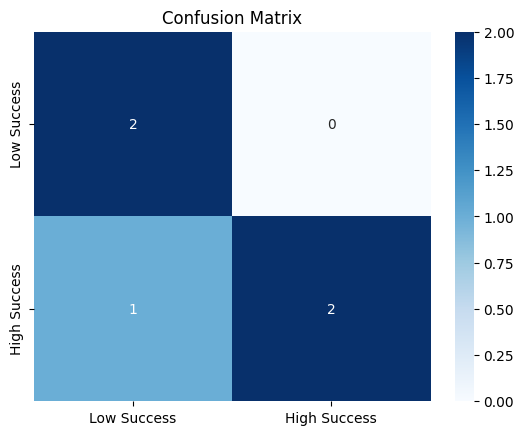

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../cleaned_fighters_data.csv')

# Define features (X) and target (y)
features = ['strikes_per_min', 'striking_accuracy', 'strikes_absorbed_per_min',
            'striking_defense', 'takedown_avg', 'takedown_accuracy', 'takedown_defense', 'submission_avg']
target = 'high_success'

# Split the data into training and testing sets
X = df[features]  # Features (metrics)
y = df[target]    # Target (high success: 1 = Yes, 0 = No)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Success', 'High Success'], yticklabels=['Low Success', 'High Success'])
plt.title('Confusion Matrix')
plt.show()
